In [42]:
!pip install folium
!pip install contextily

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import wkt

In [10]:
df = pd.read_csv ("/content/katalog_gempa.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


In [12]:
df.head()

tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4  2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN

In [13]:
df.isnull().sum()

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:

peta_indonesia = folium.Map(location=[-2.5, 118.0], zoom_start=5)

data_heatmap = df[['lat', 'lon', 'mag']].values.tolist()

HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_indonesia)

peta_indonesia

In [16]:
np.random.seed(42)
lon_peta = df['lon'] + np.random.uniform(-0.05, 0.05, size=len(df))
lat_peta = df['lat'] + np.random.uniform(-0.05, 0.05, size=len(df))

# 3. Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(lon_peta, lat_peta),
    crs='EPSG:4326'
)

# 4. Proyeksi ke Web Mercator (3857)
gdf = gdf.to_crs(epsg=3857)

# 5. Cari 5 gempa terbesar & terkecil berdasarkan magnitude
top_5 = df.sort_values('mag', ascending=False).head(5)
bottom_5 = df.sort_values('mag').head(5)

top_5, bottom_5

(              tgl            ot   lat     lon  depth  mag  \
 345    2009/01/03  19:43:54.962 -0.54  132.89     17  7.9   
 2472   2009/09/30  10:16:10.432 -0.80   99.88     81  7.7   
 25284  2016/03/02  12:49:47.458 -4.92   94.31     19  7.7   
 5480   2010/04/06  22:15:03.209  2.24   97.11     29  7.7   
 25283  2016/03/02  12:49:47.458 -4.92   94.31     19  7.7   
 
                                  remark  strike1  dip1  rake1  strike2  dip2  \
 345       Irian Jaya Region - Indonesia      NaN   NaN    NaN      NaN   NaN   
 2472       Southern Sumatra - Indonesia      NaN   NaN    NaN      NaN   NaN   
 25284  Southwest of Sumatra - Indonesia      NaN   NaN    NaN      NaN   NaN   
 5480       Northern Sumatra - Indonesia      NaN   NaN    NaN      NaN   NaN   
 25283  Southwest of Sumatra - Indonesia     96.1  84.2 -174.4     5.49  84.5   
 
        rake2  
 345      NaN  
 2472     NaN  
 25284    NaN  
 5480     NaN  
 25283   -5.8  ,
               tgl            ot   lat   

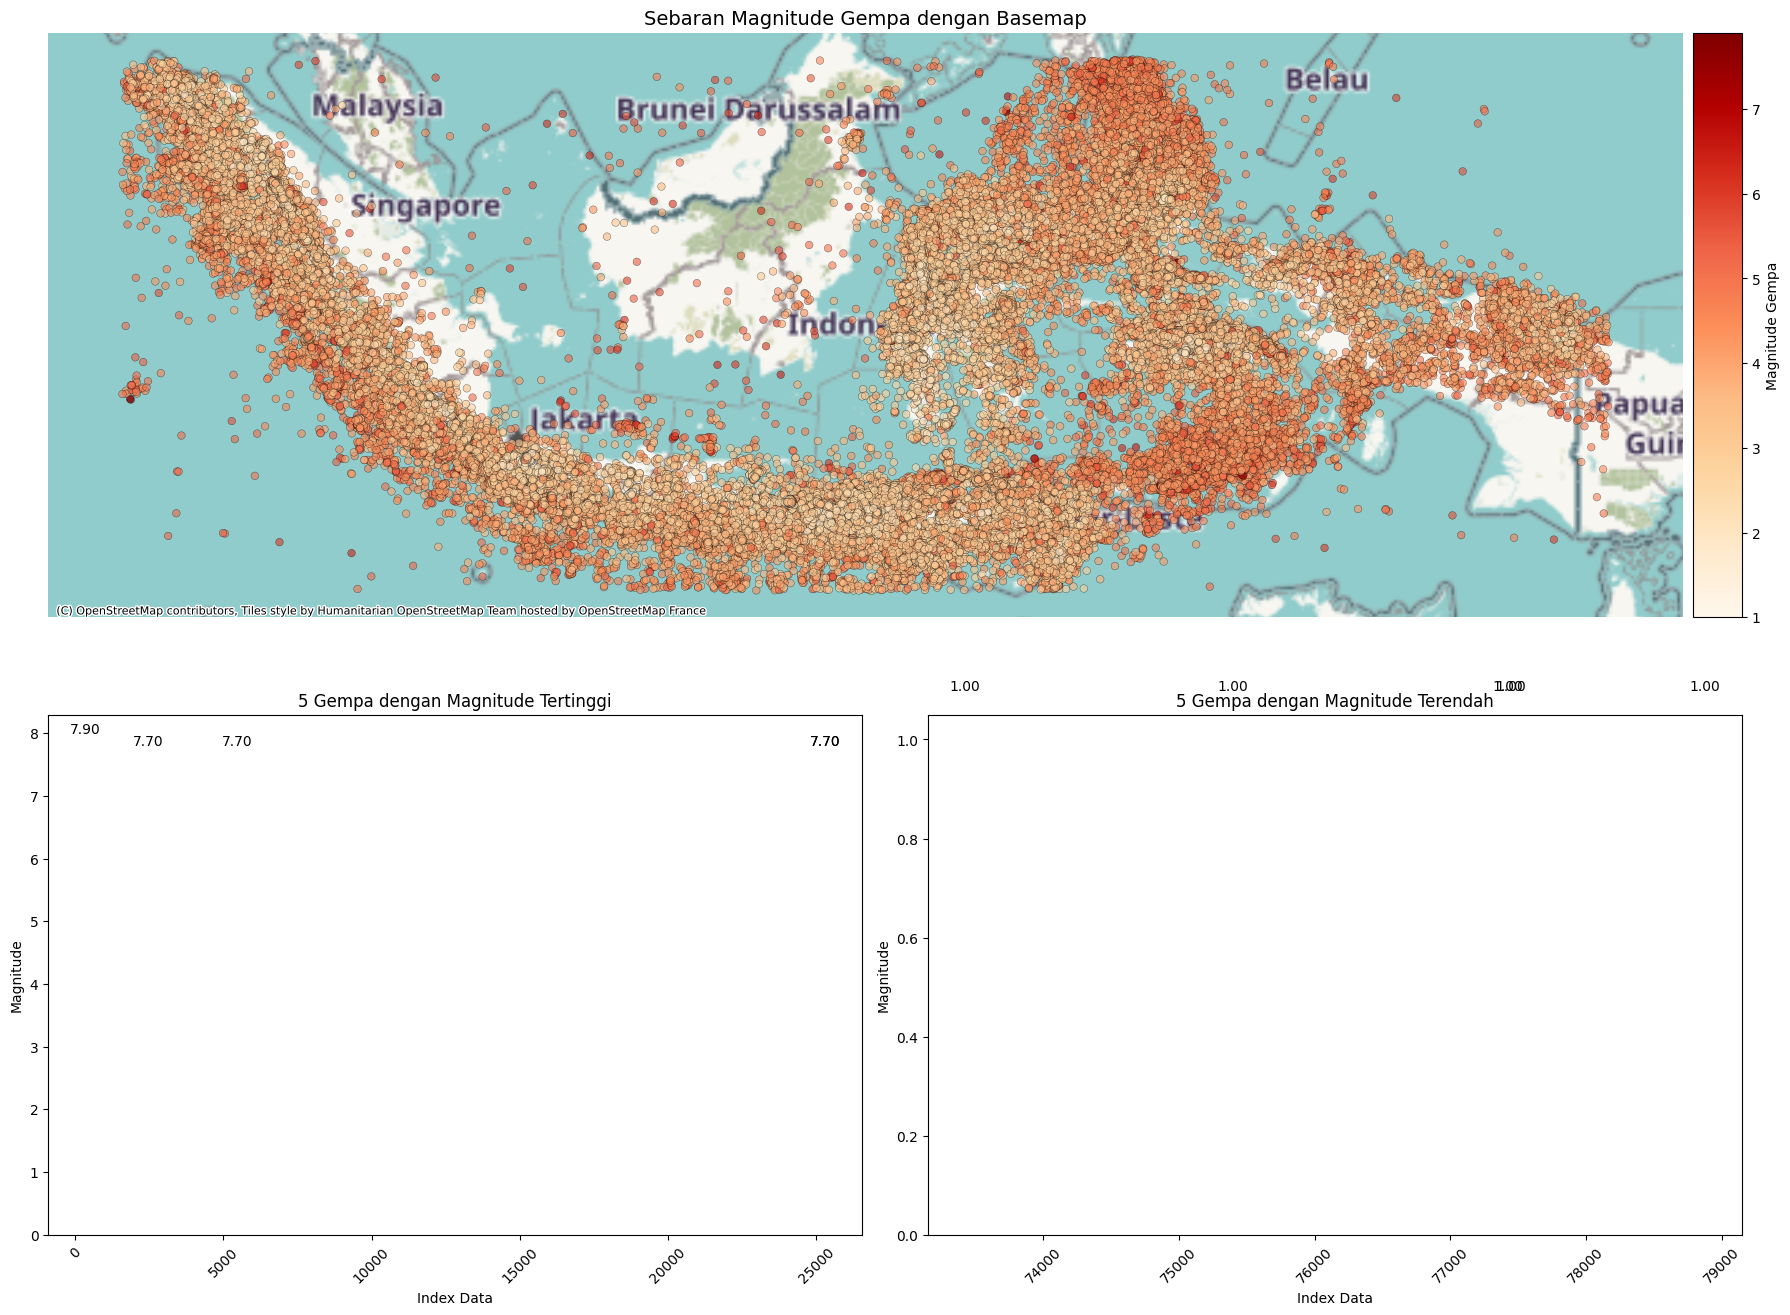

In [17]:
# Tambahkan jitter agar titik tidak bertumpuk
np.random.seed(42)
lon_peta = df['lon'] + np.random.uniform(-0.05, 0.05, len(df))
lat_peta = df['lat'] + np.random.uniform(-0.05, 0.05, len(df))

# Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(lon_peta, lat_peta),
    crs='EPSG:4326'
)

# Proyeksi ke Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Ambil TOP 5 & BOTTOM 5 berdasarkan magnitude
top_5 = df.sort_values('mag', ascending=False).head(5)
bottom_5 = df.sort_values('mag').head(5)

# ============================
# 2. Layout Figure (Gridspec)
# ============================
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(2, 2, height_ratios=[3, 2])

# ============================
# 3. Row 1 : Peta Sebaran
# ============================
ax_map = fig.add_subplot(gs[0, :])

divider = make_axes_locatable(ax_map)
cax = divider.append_axes("right", size="3%", pad=0.1)

gdf.plot(
    ax=ax_map,
    column='mag',          # diganti mag!
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Magnitude Gempa", 'orientation': "vertical"},
    cax=cax,
    markersize=30,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.6
)

ctx.add_basemap(ax_map)
ax_map.set_title("Sebaran Magnitude Gempa dengan Basemap", fontsize=14)
ax_map.axis('off')

ax_top = fig.add_subplot(gs[1, 0])
ax_bottom = fig.add_subplot(gs[1, 1])

# TOP 5
ax_top.bar(top_5.index, top_5['mag'], color='red')
ax_top.set_title("5 Gempa dengan Magnitude Tertinggi")
ax_top.set_ylabel("Magnitude")
ax_top.set_xlabel("Index Data")
ax_top.tick_params(axis='x', rotation=45)

# BOTTOM 5
ax_bottom.bar(bottom_5.index, bottom_5['mag'], color='blue')
ax_bottom.set_title("5 Gempa dengan Magnitude Terendah")
ax_bottom.set_ylabel("Magnitude")
ax_bottom.set_xlabel("Index Data")
ax_bottom.tick_params(axis='x', rotation=45)

for i, val in enumerate(top_5['mag']):
    ax_top.text(top_5.index[i], val + 0.1, f"{val:.2f}", ha='center')

for i, val in enumerate(bottom_5['mag']):
    ax_bottom.text(bottom_5.index[i], val + 0.1, f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['tgl', 'ot', 'lat', 'lon', 'depth', 'mag', 'remark', 'strike1', 'dip1',
       'rake1', 'strike2', 'dip2', 'rake2'],
      dtype='object')

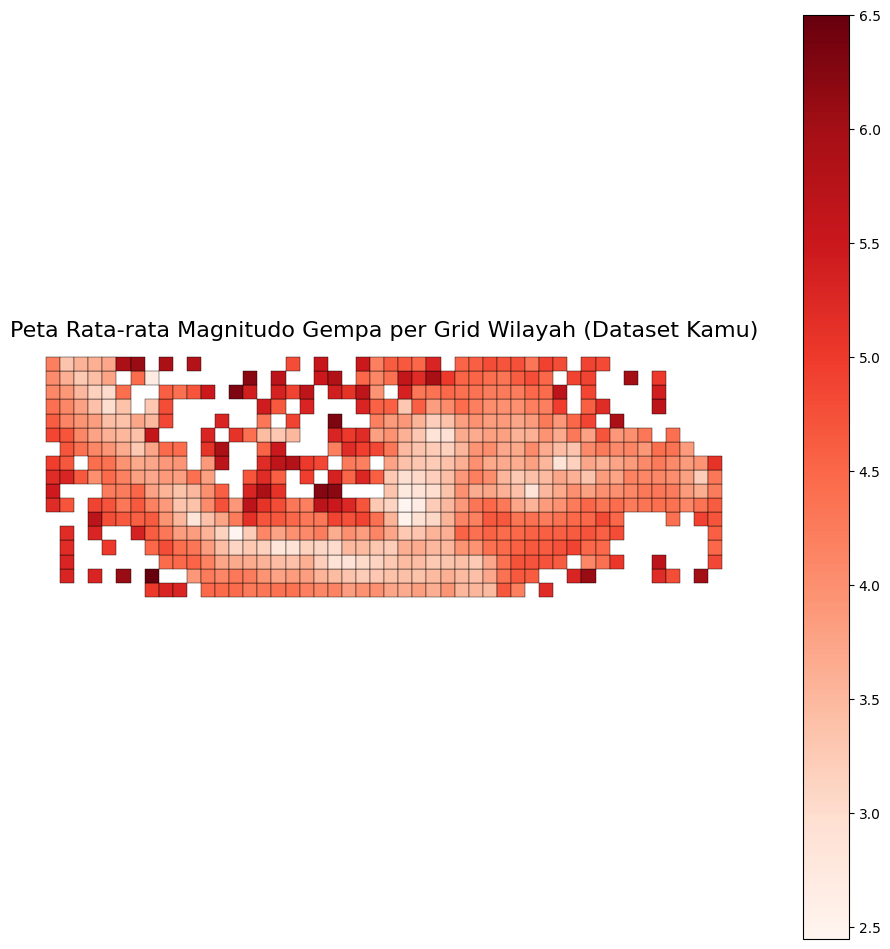

In [19]:
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

xmin, ymin, xmax, ymax = gdf.total_bounds

grid_cells = []
for x in range(int(xmin)-1, int(xmax)+2):
    for y in range(int(ymin)-1, int(ymax)+2):
        grid_cells.append(box(x, y, x+1, y+1))

grid = gpd.GeoDataFrame(geometry=grid_cells, crs="EPSG:4326")

joined = gpd.sjoin(gdf, grid, how="inner", predicate="within")

grid["MAG_mean"] = joined.groupby("index_right")["mag"].mean()

fig, ax = plt.subplots(figsize=(12, 12))

grid.plot(
    column="MAG_mean",
    ax=ax,
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.3
)

plt.title("Peta Rata-rata Magnitudo Gempa per Grid Wilayah (Dataset Kamu)", fontsize=16)
plt.axis("off")
plt.show()


In [20]:
from scipy.stats import shapiro

stat, p = shapiro(df["mag"])

print("Shapiro-Wilk Test")
print("Statistic:", stat)
print("p-value:", p)


Shapiro-Wilk Test
Statistic: 0.9912012616496502
p-value: 1.3132692936827425e-54


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 92887.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:
stat, p = shapiro(df["mag"])

print("Shapiro-Wilk Test")
print("Statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Data berdistribusi NORMAL")
else:
    print("Data TIDAK berdistribusi normal")

Shapiro-Wilk Test
Statistic: 0.9912012616496502
p-value: 1.3132692936827425e-54
Data TIDAK berdistribusi normal


=== Spearman Correlation Matrix (Numeric Only) ===
              lat       lon     depth       mag   strike1      dip1     rake1  \
lat      1.000000  0.187486  0.005764  0.123765  0.207671  0.020848 -0.003060   
lon      0.187486  1.000000  0.094008  0.183062  0.119505 -0.064898 -0.012253   
depth    0.005764  0.094008  1.000000  0.242627 -0.060090 -0.134143  0.033145   
mag      0.123765  0.183062  0.242627  1.000000 -0.084750 -0.181576  0.062056   
strike1  0.207671  0.119505 -0.060090 -0.084750  1.000000  0.228953  0.023889   
dip1     0.020848 -0.064898 -0.134143 -0.181576  0.228953  1.000000 -0.068402   
rake1   -0.003060 -0.012253  0.033145  0.062056  0.023889 -0.068402  1.000000   
strike2 -0.063278 -0.182343  0.039524  0.095639 -0.352565 -0.248829  0.091638   
dip2     0.076809  0.191923 -0.111577 -0.128061  0.272743 -0.112442 -0.159436   
rake2    0.017192  0.000717  0.084190  0.062292 -0.200696 -0.055832  0.329952   

          strike2      dip2     rake2  
lat     -0.063278

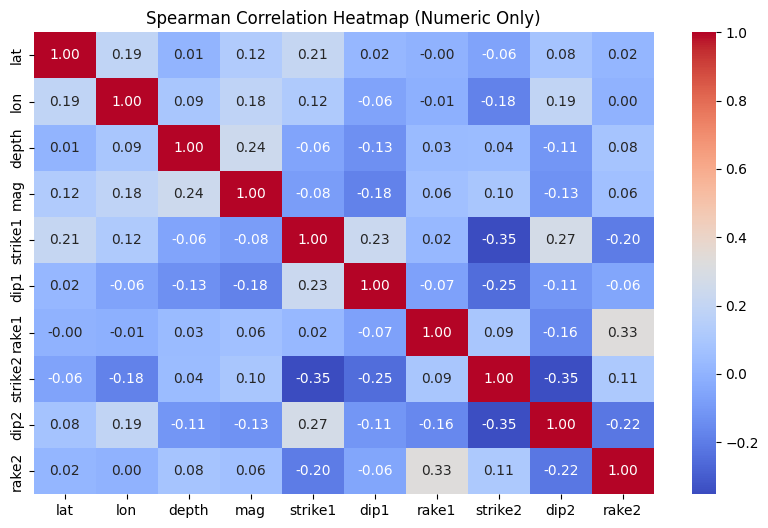


Spearman Correlation antara mag dan depth:
Koefisien: 0.24262721118568756
p-value: 0.0


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# --- FILTER HANYA KOLOM NUMERIK ---
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# 1. Hitung korelasi Spearman
corr_spearman = df_numeric.corr(method='spearman')

print("=== Spearman Correlation Matrix (Numeric Only) ===")
print(corr_spearman)

# 2. Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap (Numeric Only)")
plt.show()

# 3. Korelasi dua variabel (jika ada)
if "mag" in df_numeric.columns and "depth" in df_numeric.columns:
    coef, p = spearmanr(df["mag"], df["depth"])
    print("\nSpearman Correlation antara mag dan depth:")
    print("Koefisien:", coef)
    print("p-value:", p)
else:
    print("\nKolom 'mag' atau 'depth' tidak ditemukan sebagai kolom numerik.")


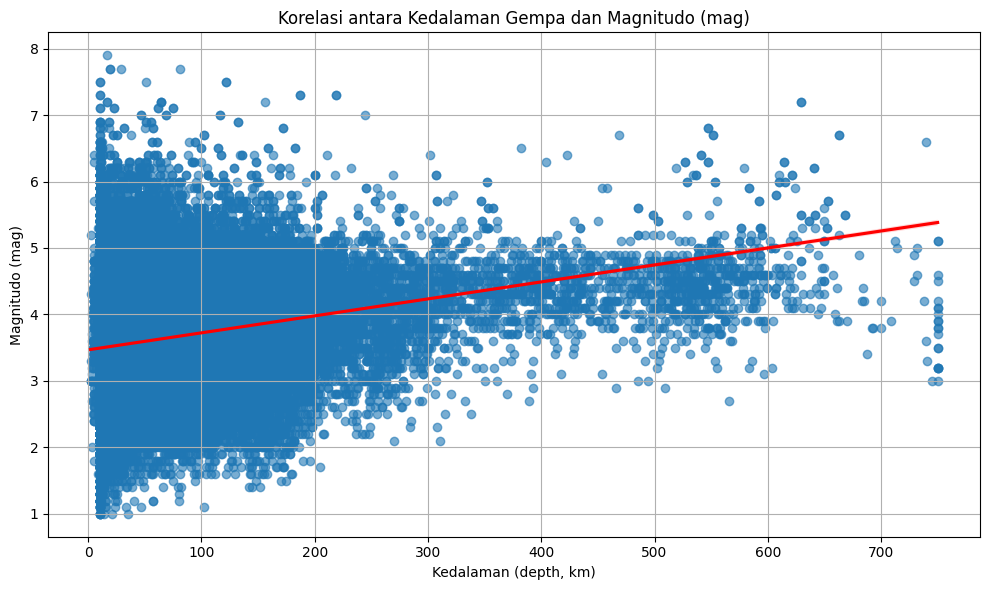

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.regplot(
    data=df,
    x='depth',
    y='mag',
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title("Korelasi antara Kedalaman Gempa dan Magnitudo (mag)")
plt.xlabel("Kedalaman (depth, km)")
plt.ylabel("Magnitudo (mag)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
normalisasi_df = df.drop(columns=['tgl','ot','remark'])

numeric_cols = normalisasi_df.select_dtypes(include=['float64','int64']).columns
numeric_cols

Index(['lat', 'lon', 'depth', 'mag', 'strike1', 'dip1', 'rake1', 'strike2',
       'dip2', 'rake2'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler

# inisialisasi scaler
scaler = StandardScaler()

# fit dan transform
scaled_data = scaler.fit_transform(normalisasi_df[numeric_cols])

# masukkan kembali menjadi DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

scaled_df.head()

lat       lon     depth       mag  strike1  dip1  rake1  strike2  \
0 -1.326293 -0.009204 -0.508195  1.567330      NaN   NaN    NaN      NaN   
1 -0.722328  0.967429 -0.508195  1.207634      NaN   NaN    NaN      NaN   
2 -0.827965 -1.156609  0.937858  0.128546      NaN   NaN    NaN      NaN   
3  0.024016  0.802195 -0.508195 -0.470948      NaN   NaN    NaN      NaN   
4 -0.690178  0.958198  0.273455  0.847938      NaN   NaN    NaN      NaN   

   dip2  rake2  
0   NaN    NaN  
1   NaN    NaN  
2   NaN    NaN  
3   NaN    NaN  
4   NaN    NaN

In [26]:
from sklearn.preprocessing import RobustScaler

# pilih kolom numerik
numeric_cols = normalisasi_df.select_dtypes(include=['float64','int64']).columns

# inisialisasi scaler
robust_scaler = RobustScaler()

# fit transform
scaled_data = robust_scaler.fit_transform(normalisasi_df[numeric_cols])

# buat dataframe baru hasil normalisasi
normalisasi_robust = pd.DataFrame(scaled_data, columns=numeric_cols)

# lihat hasil normalisasi
normalisasi_robust.head()

lat       lon     depth       mag  strike1  dip1  rake1  strike2  \
0 -0.781308 -0.152950 -0.136364  1.166667      NaN   NaN    NaN      NaN   
1 -0.453583  0.617626 -0.136364  0.916667      NaN   NaN    NaN      NaN   
2 -0.510903 -1.058267  2.386364  0.166667      NaN   NaN    NaN      NaN   
3 -0.048598  0.487254 -0.136364 -0.250000      NaN   NaN    NaN      NaN   
4 -0.436137  0.610342  1.227273  0.666667      NaN   NaN    NaN      NaN   

   dip2  rake2  
0   NaN    NaN  
1   NaN    NaN  
2   NaN    NaN  
3   NaN    NaN  
4   NaN    NaN

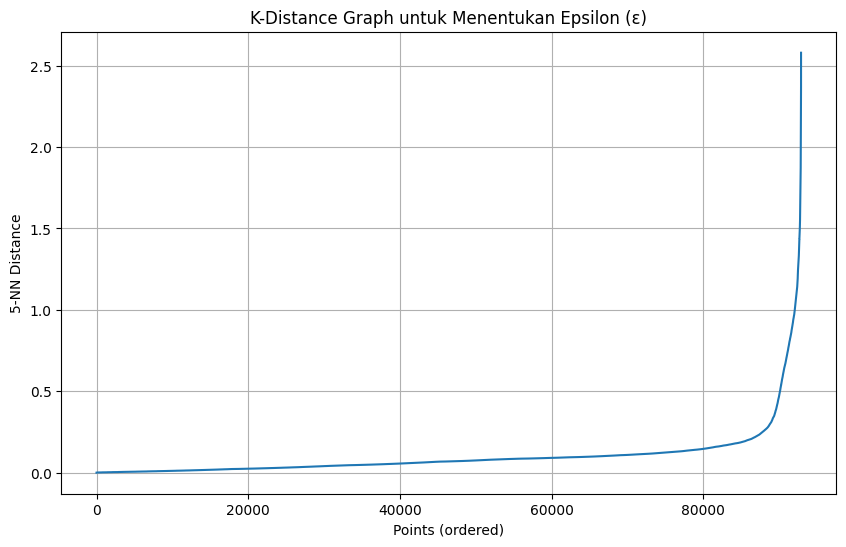

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# imputasi median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(normalisasi_robust)
normalisasi_clean = pd.DataFrame(X_imputed, columns=normalisasi_robust.columns)

# gunakan data bersih
X = normalisasi_clean.values

k = 5

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.title("K-Distance Graph untuk Menentukan Epsilon (ε)")
plt.xlabel("Points (ordered)")
plt.ylabel(f"{k}-NN Distance")
plt.grid(True)
plt.show()

In [28]:
# 1. pilih kolom numerik saja
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
normalisasi_df = df[numeric_cols]

# 2. robust scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
normalisasi_robust = scaler.fit_transform(normalisasi_df)

# ubah ke dataframe lagi
normalisasi_robust = pd.DataFrame(normalisasi_robust, columns=numeric_cols)

# cek
normalisasi_robust.head()

lat       lon     depth       mag  strike1  dip1  rake1  strike2  \
0 -0.781308 -0.152950 -0.136364  1.166667      NaN   NaN    NaN      NaN   
1 -0.453583  0.617626 -0.136364  0.916667      NaN   NaN    NaN      NaN   
2 -0.510903 -1.058267  2.386364  0.166667      NaN   NaN    NaN      NaN   
3 -0.048598  0.487254 -0.136364 -0.250000      NaN   NaN    NaN      NaN   
4 -0.436137  0.610342  1.227273  0.666667      NaN   NaN    NaN      NaN   

   dip2  rake2  
0   NaN    NaN  
1   NaN    NaN  
2   NaN    NaN  
3   NaN    NaN  
4   NaN    NaN

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(normalisasi_robust)
normalisasi_clean = pd.DataFrame(X_imputed, columns=normalisasi_robust.columns)

normalisasi_clean.head()

lat       lon     depth       mag  strike1  dip1  rake1  strike2  \
0 -0.781308 -0.152950 -0.136364  1.166667      0.0   0.0    0.0      0.0   
1 -0.453583  0.617626 -0.136364  0.916667      0.0   0.0    0.0      0.0   
2 -0.510903 -1.058267  2.386364  0.166667      0.0   0.0    0.0      0.0   
3 -0.048598  0.487254 -0.136364 -0.250000      0.0   0.0    0.0      0.0   
4 -0.436137  0.610342  1.227273  0.666667      0.0   0.0    0.0      0.0   

   dip2  rake2  
0   0.0    0.0  
1   0.0    0.0  
2   0.0    0.0  
3   0.0    0.0  
4   0.0    0.0

In [30]:
num_cols = ['lat','lon','depth','mag']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# pilih kolom numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

# imputasi missing value
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df[num_cols])

# scaling
scaler = StandardScaler()
normalisasi_clean = scaler.fit_transform(X_imputed)

In [34]:
from sklearn.impute import SimpleImputer

# pilih kolom numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

# imputasi NA
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalisasi_df = scaler.fit_transform(df[num_cols])


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalisasi_df)

df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(normalisasi_df)


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalisasi_df)

df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]

In [40]:
df['Cluster'] = labels

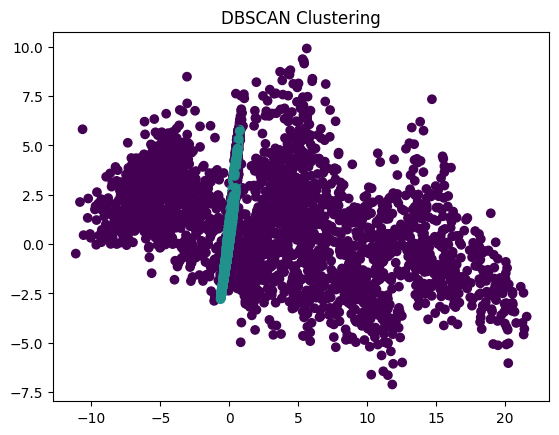

In [41]:
import matplotlib.pyplot as plt

plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title("DBSCAN Clustering")
plt.show()